Please upload the 'Customer Personality Analysis' dataset CSV file:


Saving marketing_campaign.csv to marketing_campaign (2).csv

Dataset loaded with tab separator.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 n

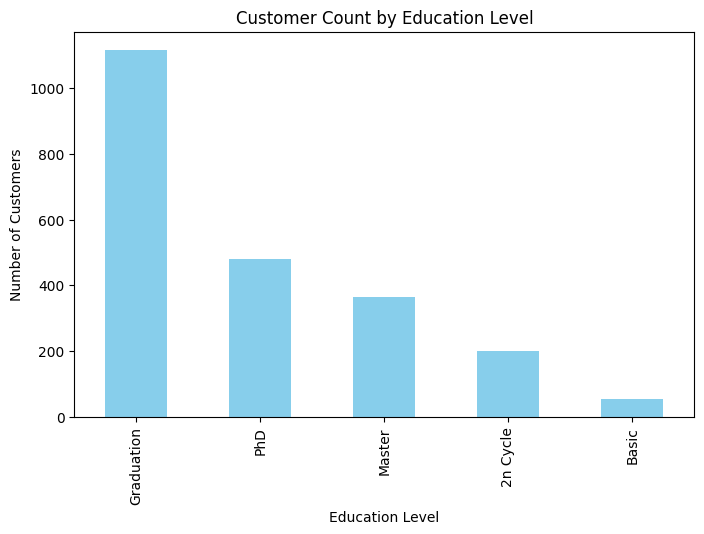

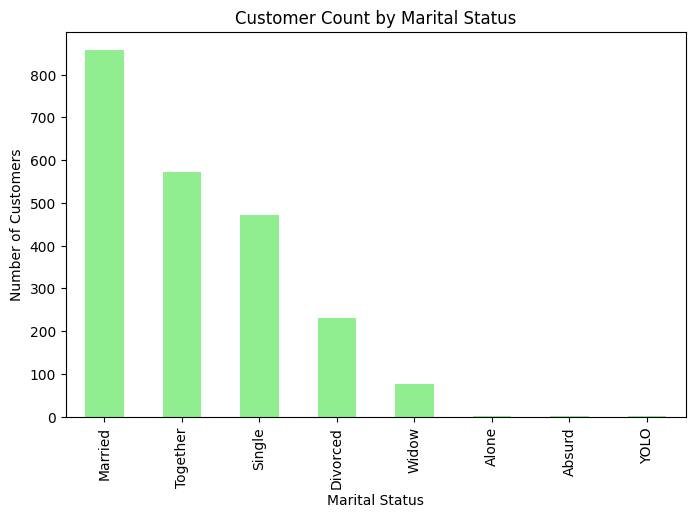


Numerical Columns for Correlation Matrix: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


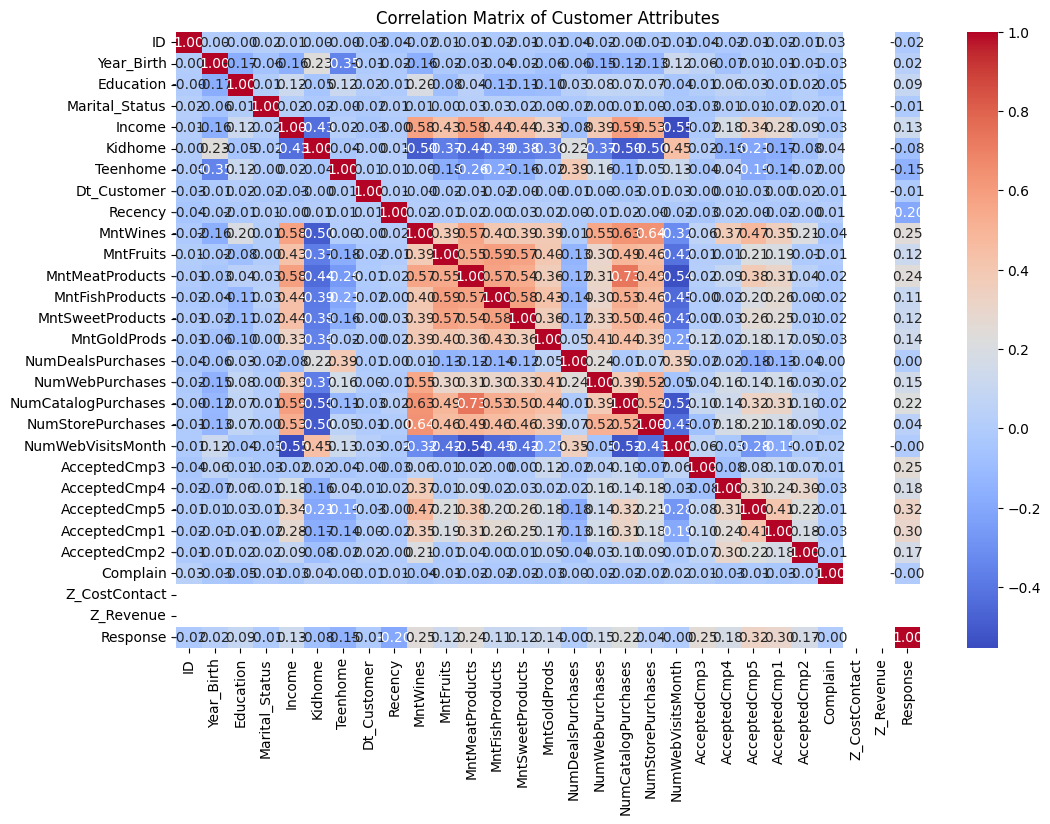

In [12]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload the dataset
print("Please upload the 'Customer Personality Analysis' dataset CSV file:")
uploaded = files.upload()

# Step 2: Load the dataset (check delimiter)
file_name = list(uploaded.keys())[0]
try:
    df = pd.read_csv(file_name, sep='\t')  # Assuming tab-separated values
    print("\nDataset loaded with tab separator.")
except:
    df = pd.read_csv(file_name)  # Fallback to default comma separator
    print("\nDataset loaded with comma separator.")

# Step 3: Display dataset information
print("\nDataset Info:")
print(df.info())

# Step 4: Display first few rows
print("\nFirst Few Rows of the Dataset:")
print(df.head())

# Step 5: Check for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())

# Step 6: Handle missing values (drop rows with missing values)
df = df.dropna()

# Step 7: Convert categorical columns to numerical (for analysis)
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_columns)

df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Step 8: Basic analysis of customer segments
if 'Education' in df.columns:
    education_counts = df['Education'].value_counts()
    print("\nCustomer Count by Education Level:")
    print(education_counts)
else:
    print("\nColumn 'Education' not found. Skipping this analysis.")

if 'Marital_Status' in df.columns:
    marital_counts = df['Marital_Status'].value_counts()
    print("\nCustomer Count by Marital Status:")
    print(marital_counts)
else:
    print("\nColumn 'Marital_Status' not found. Skipping this analysis.")

# Step 9: Visualizations
if 'Education' in df.columns:
    # Visualization: Education Level of Customers
    plt.figure(figsize=(8, 5))
    education_counts.plot(kind='bar', color='skyblue')
    plt.title('Customer Count by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Number of Customers')
    plt.show()

if 'Marital_Status' in df.columns:
    # Visualization: Marital Status of Customers
    plt.figure(figsize=(8, 5))
    marital_counts.plot(kind='bar', color='lightgreen')
    plt.title('Customer Count by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Number of Customers')
    plt.show()

# Step 10: Advanced Analysis - Correlation Matrix
print("\nNumerical Columns for Correlation Matrix:", df_encoded.select_dtypes(include=['number']).columns)

plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.corr()  # Use the encoded dataset for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Customer Attributes')
plt.show()
